<a href="https://colab.research.google.com/github/Mustafamkhan/ibp_class_mustafa/blob/main/ibp_class_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# basic library imports
import pandas as pd
import numpy as np
import math

In [63]:
df = pd.read_csv(r'/content/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [64]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [66]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Exploratory data analysis

In [67]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [69]:
df.unique()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [70]:
x = ['Age','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','MonthlyIncome',]
df[x]

,Age,YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion,MonthlyIncome
0,41,6,5,0,5993
1,49,10,7,1,5130
2,37,0,0,0,2090
3,33,8,0,3,2909
4,27,2,2,2,3468
...,...,...,...,...,...
1465,36,5,3,0,2571
1466,39,7,7,1,9991
1467,27,6,3,0,6142
1468,49,9,8,0,5390


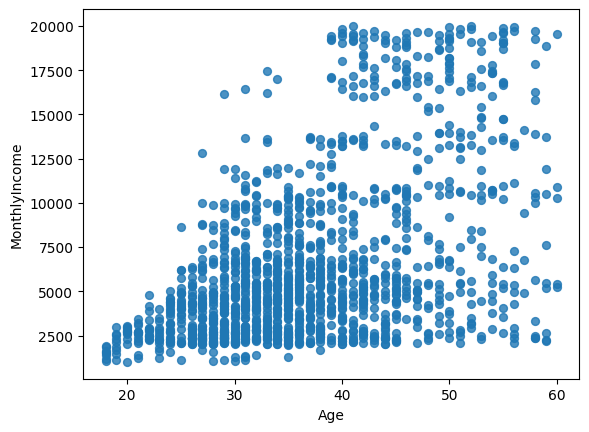

In [34]:
from matplotlib import pyplot as plt
df.plot(kind='scatter',x='Age',y='MonthlyIncome',s=32,alpha=0.8)
plt.gca().spines[['top','right',]].set_visible(True)

<Axes: xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

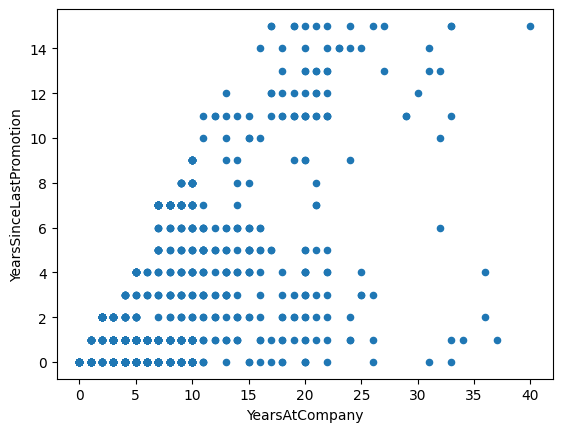

In [35]:
import seaborn as sns
df.plot.scatter('YearsAtCompany','YearsSinceLastPromotion')

<ipython-input-45-d0813b2b5e8f>:1: FutureWarning: 

The `errcolor` parameter is deprecated. And will be removed in v0.15.0. Pass `err_kws={'color': 'w'}` instead.

  ax = sns.barplot(x='Age',y='MonthlyIncome',errcolor='w', capsize=0.5, data=df)


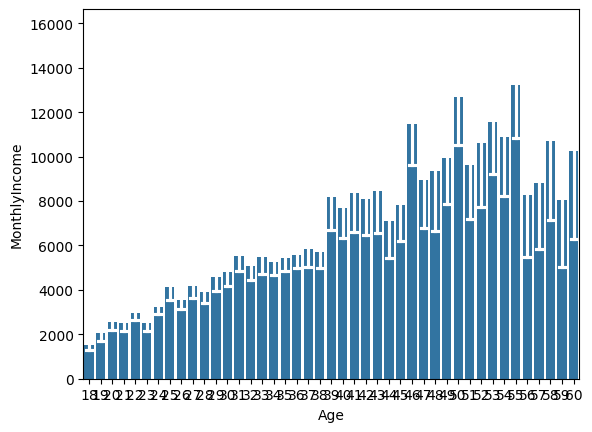

In [45]:
ax = sns.barplot(x='Age',y='MonthlyIncome',errcolor='w', capsize=0.5, data=df)

<Axes: xlabel='Age'>

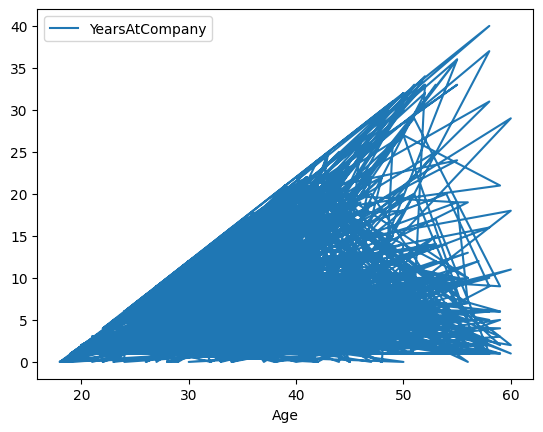

In [49]:
df.plot.line('Age', ['YearsAtCompany',])

# Regression Based Machine Learning Model

In [86]:
from sklearn.linear_model import LinearRegression
import matplotlib
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [72]:
x = ['Age','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','MonthlyIncome']
df = df[x]
df

,Age,YearsAtCompany,YearsWithCurrManager,YearsSinceLastPromotion,MonthlyIncome
0,41,6,5,0,5993
1,49,10,7,1,5130
2,37,0,0,0,2090
3,33,8,0,3,2909
4,27,2,2,2,3468
...,...,...,...,...,...
1465,36,5,3,0,2571
1466,39,7,7,1,9991
1467,27,6,3,0,6142
1468,49,9,8,0,5390


In [74]:
# all other variables
x = df.drop('YearsAtCompany', axis=1)
# target
y = df['YearsAtCompany']


In [76]:
# using the train test split function
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=104,test_size=0.25,shuffle=True)

In [78]:
# create linear regression object
regr = LinearRegression()

In [79]:
# train the model using the training sets
regr.fit(X_train, y_train)

LinearRegression()

In [80]:
# make predictions using the testing set
y_pred = regr.predict(X_test)

In [81]:
# the coefficients
print('Coefficients: \n', regr.coef_)

Coefficients: 
 [1.67810321e-02 1.00076251e+00 4.31510854e-01 2.80064820e-04]


In [87]:
# the mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

Mean squared error: 9.99


In [88]:
r2_score(y_pred,y_test)

0.5976239834420753

In [90]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [91]:
# create linear regression object
random_r = RandomForestRegressor()

In [92]:
# train the model using the training sets
random_r.fit(X_train,y_train)

RandomForestRegressor()

In [93]:
y_pred_s = random_r.predict(X_test)

In [95]:
y_pred_s

array([ 3.74,  2.29,  1.4 ,  8.62,  8.47,  2.25, 28.34,  2.56,  2.14,
        3.84,  4.66,  5.11,  7.52,  0.76,  5.59,  2.54, 11.46,  4.24,
        8.16,  3.63,  4.35,  8.52,  5.1 ,  8.63,  6.34,  1.1 , 11.98,
        2.51,  6.45,  3.6 , 13.7 , 12.6 ,  4.01,  7.82,  0.65, 12.07,
        0.94,  3.58,  2.43,  4.11,  8.85,  8.82,  4.65, 15.39, 12.62,
        7.73,  5.51,  3.91,  3.39, 11.61,  1.  ,  7.84,  5.48,  2.14,
        4.84,  3.41,  4.88,  3.32, 16.54,  4.36,  1.09,  5.87, 10.48,
        2.88,  0.8 , 12.73,  3.09,  8.35,  1.72,  8.08,  7.49,  0.77,
       13.32, 11.52,  6.97,  1.  ,  7.63, 11.68,  4.28,  0.81,  4.27,
        4.59,  3.77,  4.65,  0.59,  3.34,  0.  ,  3.4 ,  4.29,  2.42,
       11.08,  5.09,  5.24, 20.02,  5.32,  7.65,  7.71,  9.68,  2.95,
       11.43,  0.98,  3.68,  4.33,  9.63, 15.12,  6.48,  8.73,  8.36,
        4.64,  1.76,  0.97,  8.78,  1.09,  4.32, 12.32,  4.91, 17.54,
        0.44,  4.62,  0.03, 13.72,  2.84,  0.76, 13.1 , 11.83, 10.05,
        3.37,  0.99,

In [97]:

# perform 5-fold cross validation
scores = cross_val_score(random_r,x,y,cv=5)

In [98]:
# print the average score
print("Average cross-validation score:", scores.mean())

Average cross-validation score: 0.7598117715961997


In [99]:
# how to clean null values: df['Column name'],fillna(1,inplace=True)
# how to calculate mode:
df['Age'].mode()

0    35
Name: Age, dtype: int64

# Assessment for DS and ML - AJ

In [ ]:
# two more int. variables
# use decision tree regressor
# make 2 plots of visualization